# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [24]:
# imports
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
data=pd.read_csv('dataset_banco_clean.csv')

In [26]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

### 1. Análisis de cada variable de manera individual

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


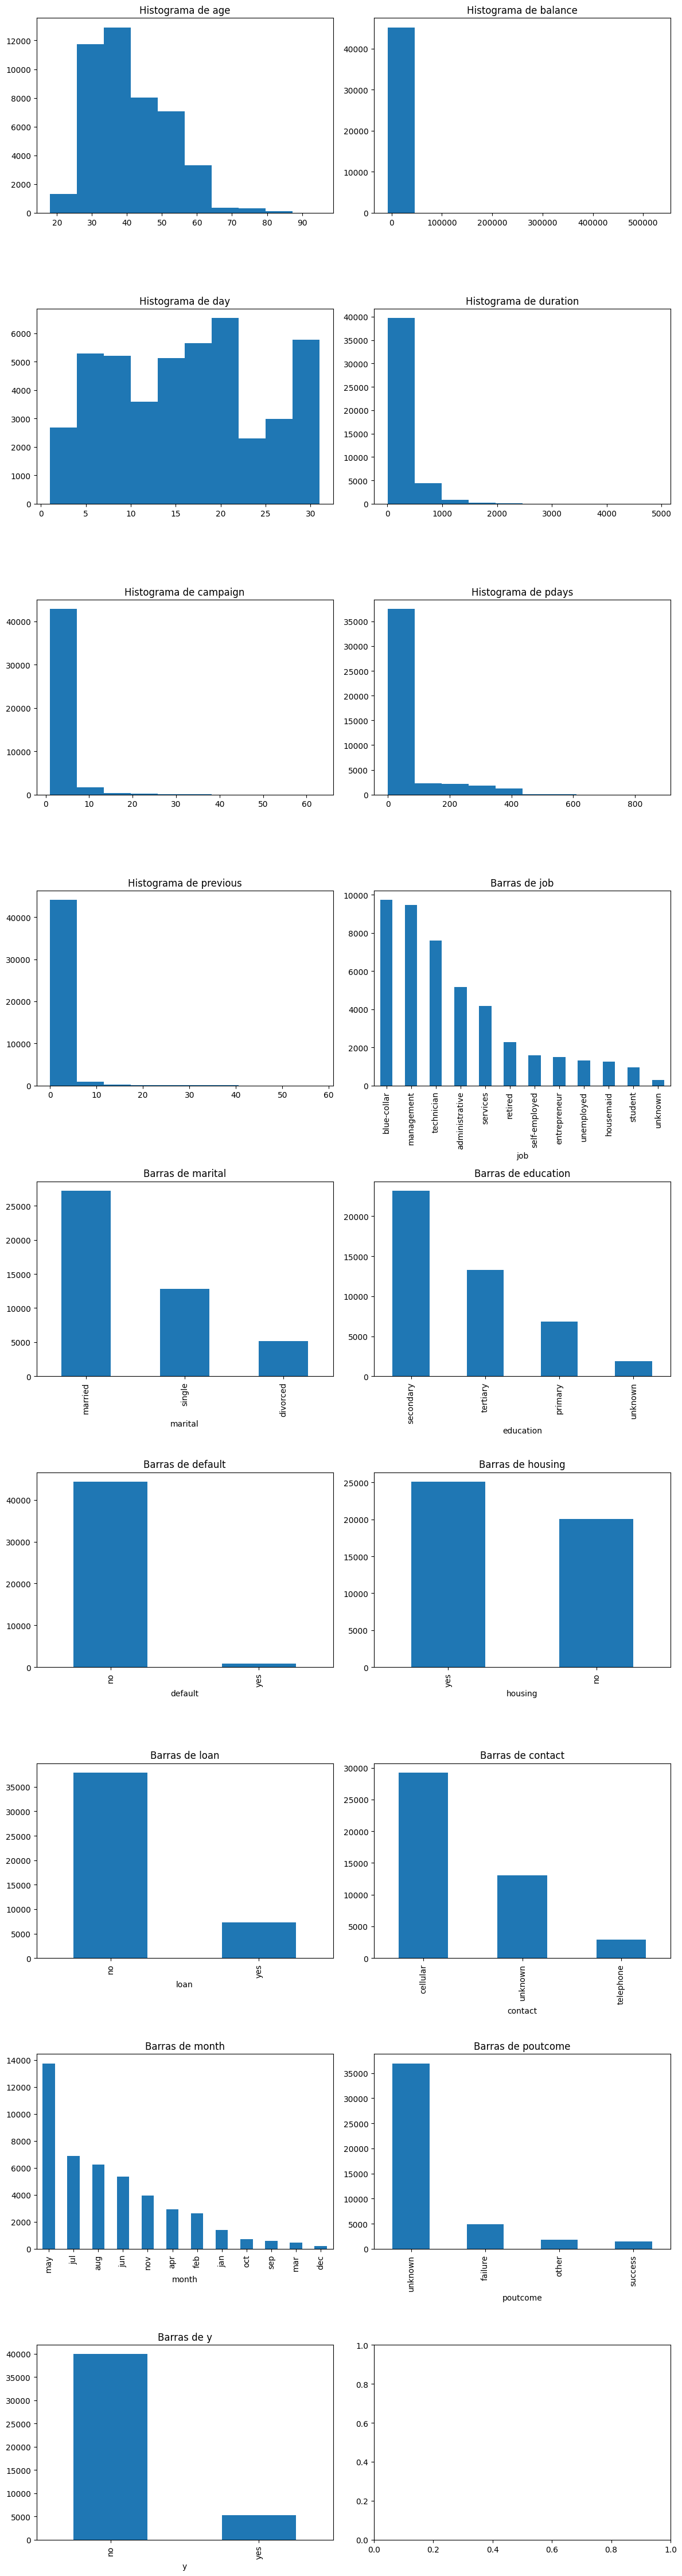

In [27]:
tipos_de_datos = data.dtypes

# Separar las variables en categóricas y numéricas
variables_categoricas = []
variables_numericas = []

for nombre, tipo in tipos_de_datos.items():
    if tipo == 'object':
        variables_categoricas.append(nombre)
    else:
        variables_numericas.append(nombre)

print(variables_categoricas)

print(variables_numericas)
# Calcular el número total de subgráficos
num_subgraficos = len(variables_numericas) + len(variables_categoricas)

# Calcular el número de filas y columnas para los subgráficos
num_filas = (num_subgraficos + 1) // 2  
num_columnas = 2

# Ajustar el tamaño de la figura para hacerla más alta
altura_figura = num_filas * 5
fig, axs = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(12, altura_figura))

# Crear histogramas para variables numéricas
for i, var_num in enumerate(variables_numericas):
    fila = i // num_columnas
    columna = i % num_columnas
    axs[fila, columna].hist(data[var_num], bins=10)
    axs[fila, columna].set_title(f'Histograma de {var_num}')

# Crear gráficos de barras para variables categóricas
for i, var_cat in enumerate(variables_categoricas):
    fila = (i + len(variables_numericas)) // num_columnas
    columna = (i + len(variables_numericas)) % num_columnas
    data[var_cat].value_counts().plot(kind='bar', ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Barras de {var_cat}')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()


En el análisis individual que se ha realizado de cada variable es interesante destacar los siguientes puntos:

- Primero ser conscientes de que hay más muestras de individuos que no se han suscrito que individuos que si y que el público que nos interesa entender en profundidad son aquellos que si que se suscriben.
  
- La edad de la mayoría de los participantes ronda de los 28 a los 55 aproximadamente.
  
- La gran mayoría de las llamadas telefónicas son relativamente cortas siendo estas inferiores a 10 minutos y la compañía suele contactar con los individuos menos de 10 veces.
  
- Muchos de los idividuos han sido contactados al menos 100 días antes de la campaña, por lo que hay contacto 'frecuente' con los clientes, pero hay cierta cantidad que llevan sin mantener contacto con la compañía más de 3 meses. Además casi todos como mucho han hablado con la compañía 6 veces aproximadamente. Además no cambia a la frecuencia con la que se habla durante la campaña. Por lo que se puede ver que no han hecho incapie en llamar más veces a los clientes para recordarles las novedades.
  
- La gran mayoria de los clientes están casados, tienen créditos hipotecarios, no tienen créditos de consumo y todo esto puede hacer que tengan unas necesidades especificas que permitan a la compañia hacer ofertas más atractivas para este perfil de gente.
  

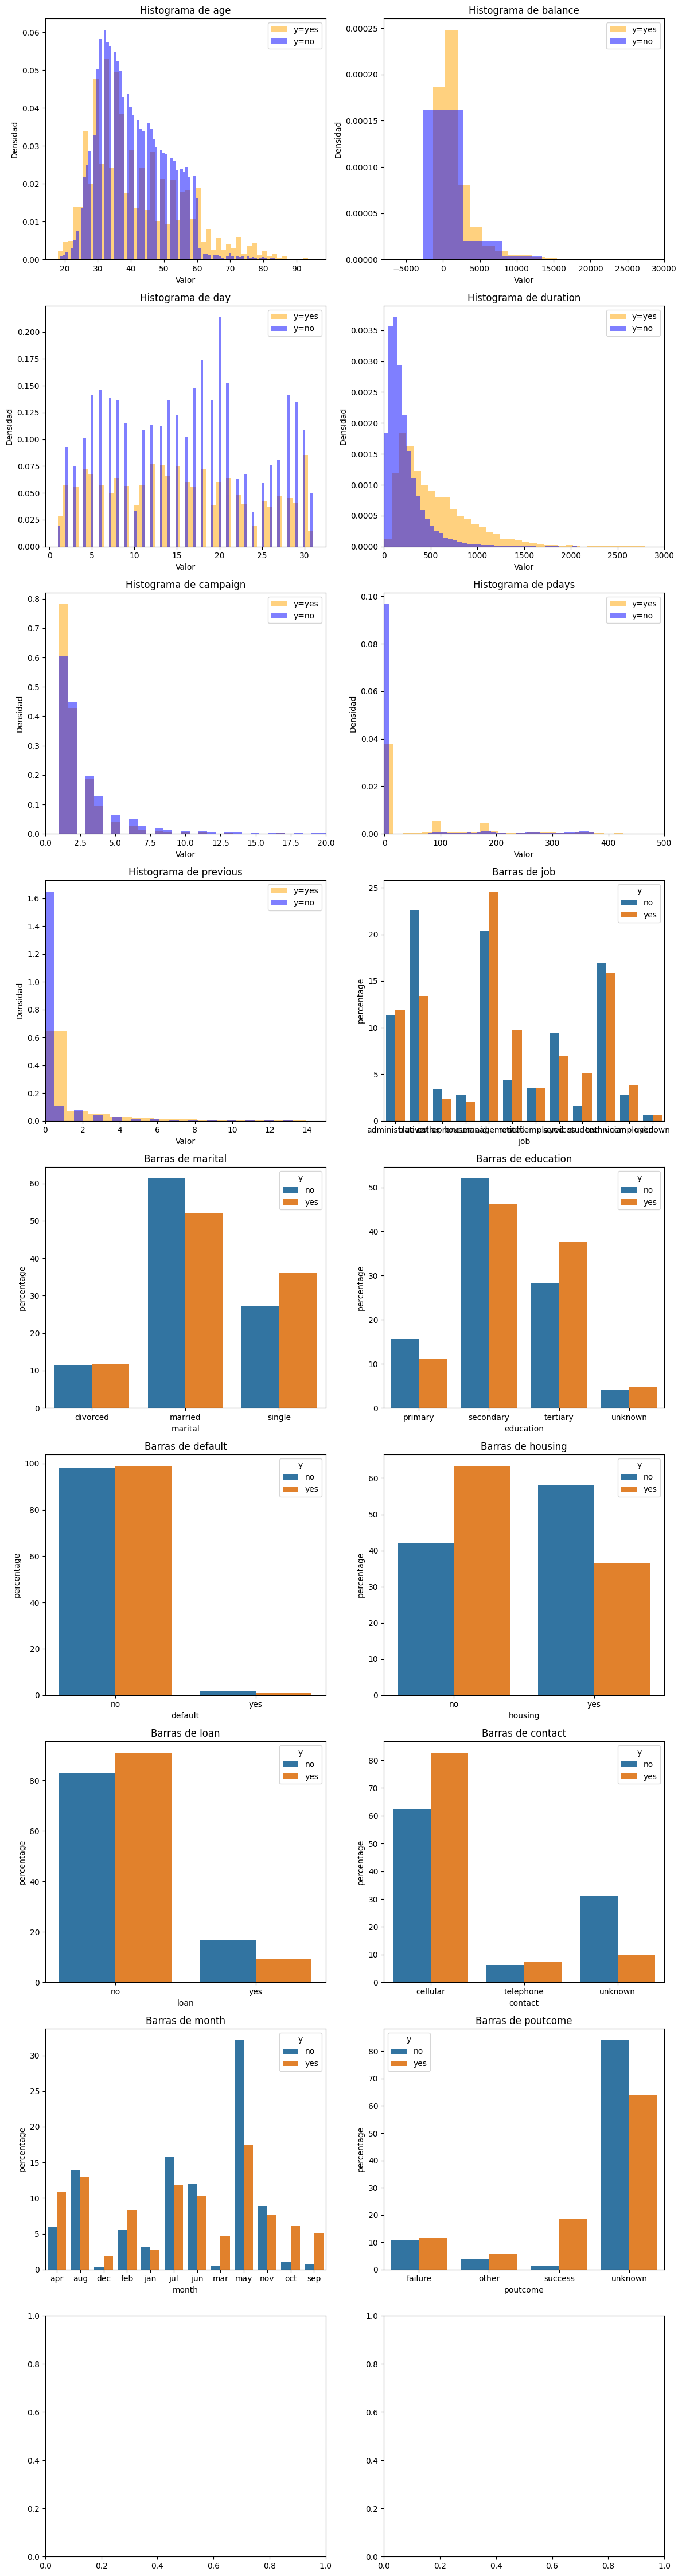

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tipos_de_datos = data.dtypes

# Separar las variables en categóricas y numéricas
variables_categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
variables_numericas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Calcular el número total de subgráficos
num_subgraficos = len(variables_numericas) + len(variables_categoricas) + 1  

# Calcular el número de filas y columnas para los subgráficos
num_filas = (num_subgraficos + 1) // 2  
num_columnas = 2

# Ajustar el tamaño de la figura para hacerla más alta
altura_figura = num_filas * 5  # Ajusta este valor según tu preferencia
fig, axs = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(12, altura_figura))

for i, var_num in enumerate(variables_numericas):
    fila = i // num_columnas
    columna = i % num_columnas

# Filtrar los datos para y=yes y y=no
    datos_yes = data.loc[data['y'] == 'yes', var_num]
    datos_no = data.loc[data['y'] == 'no', var_num]
    
    # Crear histogramas
    axs[fila, columna].hist(datos_yes, bins=50, color='orange', alpha=0.5, label='y=yes', density=True)
    axs[fila, columna].hist(datos_no, bins=100, color='blue', alpha=0.5, label='y=no', density=True)


    if (var_num ==  'campaign'):
        axs[fila, columna].set_xlim(0, 20)

    elif (var_num == 'balance') :
        axs[fila, columna].set_xlim(min(data[var_num]),30000)

    elif var_num == 'duration':
        axs[fila, columna].set_xlim(0, 3000)
    elif var_num =='pdays':
        axs[fila, columna].set_xlim(min(data[var_num]),500)
    elif var_num == 'previous':
        axs[fila, columna].set_xlim(0, 15)
    
    axs[fila, columna].legend()
    axs[fila, columna].set_title(f'Histograma de {var_num}')
    axs[fila, columna].set_xlabel('Valor')
    axs[fila, columna].set_ylabel('Densidad')

# Crear gráficos de barras para variables categóricas
for i, var_cat in enumerate(variables_categoricas):
    fila = (i + len(variables_numericas)) // num_columnas
    columna = (i + len(variables_numericas)) % num_columnas
    porcentajes_y_var_cat = data.groupby(['y', var_cat]).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1) * 100
    porcentajes_y_var_cat = porcentajes_y_var_cat.stack().reset_index(name='percentage')

    sns.barplot(data=porcentajes_y_var_cat, x=var_cat, y='percentage', hue='y', ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Barras de {var_cat}')
    

plt.tight_layout()
plt.show()


De los gráficos anteriores podemos sacar algunas conclusiones interesantes:

- la gente que tienen un balance negativo o relativamente bajo son los que mayormente se acogen al plan
- Realizar el contacto con los clientes mediante teléfono movil es mucho más eficaz que mediante teléfono fijo porque hanbría que centrar los espuerzos en este medio.
- La duración del último contacto cuanto mayor sea más probabilidades hay de que se suscriban al plan ya que muy pocos de los que la llamada ha durado mucho no se han suscrito.
- Aquellos miembros que anteriormente ya habian aceptado la campaña anterior con una alta probabilidad se puede decir que aceptarán esta también
-  Aunque hay más individuos de edad intermedia podría ser interesante centrar los esfuerzos en la gente mayor y la gente joven ya que son aquellos que se ha podido ver que tienen mayor tasa de conversión
-  Los individuos que no tienen un crédito hipotecario ni algún prestamo son más propensos a aceptar el plan.
-  Cuanto más veces se llame a un individuo durante la campaña no se ve una mejoria en cuanto a la tasa de coversion por lo que se puede intuir que hasta las 3 primeras llamadas son las mas cruciales para que se suscriban al plan luego puede que se suscriban pero no con tanta seguridad.
-  Es interesante mantener contacto frecuente con los clientes ya que si hace mucho tiempo que no se mantiene contacto con ellos la tasa de conversion es bastalnte baja. Además cuantas más veces se haya contactado con ese cliente más probable es que se suscriban al plan.

In [39]:
import plotly.express as px

fig = px.scatter_matrix(
    data,
    dimensions=variables_numericas,
    color='y',  # La variable categórica para el color
    labels={col: col.replace('_', ' ') for col in variables_numericas} ,
    width=1400,  # Ancho de la figura en píxeles
    height=1400 
)

# Mostrar el gráfico
fig.show()

Se puede ver que no hay una correlación fuerte entre ninguna de las variables. 

# Conclusiones

En cuanto al método que debe seguir la empresa para facilitar la conversión es realizar las llamadas a los clientes mediante teléfono móvil y además buscar mantener llamadas largas ya que de este modo la tasa de conversión aumenta significativamente. Además deben considerar que las primeras llamadas son las más importantes ya que es cuando más probabilidad hay de que se suscriban. Otro aspecto importante es no dejar mucho tiempo desde el último contacto ya que un contacto más frecuente favorece la suscripción.

Respecto al perfil que debe tener el cliente es interesate centrarse en gente que no tiene ningún tipo de préstamo y que tiene ingresos bajos. También es interesante comenzar con aquellos que previamente ya han aceptado otra campaña ya que son más propensos a suscribirse y en cuanto a edades buscar aquellos perfiles más jóvenes y más mayores ya que es con quien mejores resultados se han visto.